<a href="https://colab.research.google.com/github/karinadw/Neutrino-classification-CNN/blob/main/neutrino_mini_project%20(version%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEUTRINO EVENT CLASSIFICATION

### Machine learning mini project

### Karina Dansinghani Wadhwani

[Task 1 and Task 2](#cell-id)

In [1]:
## IMPORTING ALL THE NECESSARY MODULES

import matplotlib.pyplot as plt
import numpy as np
import math
import h5py

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import callbacks 

import matplotlib.style                     
import matplotlib as mpl                    

from tqdm.notebook import tqdm              # imports a progress bar
from IPython.display import display, Math

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi'] = 200            # dots per inch

#Useful for debugging problems
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.0


In [2]:
import enum 
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



<a name="cell-id"></a>
# TASK 1 AND TASK 2

## Restrieving the data files

Here I am creating a definition to retrieve all the data files and include all the name of the files in an array. 

In [4]:
import urllib.request


def data_retriever(file_number):

  model_lab=[]
  model_in_1 = []
  model_in_2 = []
  
  core = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino'
  counter = 1
  end = '.h5'
  f_name=[]
  
  #file_number=10

  for i in tqdm(range(0,file_number)):
    
    filename = "neutrino" + str(counter) + ".h5"
    urllib.request.urlretrieve(core+str(counter)+end, filename)
    f_name.append(h5py.File(filename, 'r'))
    counter += 1

  return f_name

In [17]:
def slice_data(data, frac):
  """
  Function to slice the simulation data into training and testing datasets
  """

  place = round(len(data)*frac)

  files_1 = data[:place]
  files_2 = data[place:]

  return files_1, files_2

In [18]:
files=data_retriever(7)

In [19]:
model_lab = []
model_in_1 = []
model_in_2 = []

for i in tqdm(range(0,7)):
  data_length = len(files[i]['neutrino']['interaction'])

  for j in range(data_length):  
    if (files[i]['neutrino']['interaction'][j])>3: 
      m = (files[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(0)) # 0 is Not muon charged-current event
    else:
      pass
    

for z in tqdm(range(0,1)):
  data_length = len(files[z]['neutrino']['interaction'])
  for k in range(data_length):
    if (files[z]['neutrino']['interaction'][k])<=3:
      m = (files[z]['cvnmap'][k]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(1)) # 1 is muon charged-current event
    else:
      pass
  


(array([5789.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6156.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

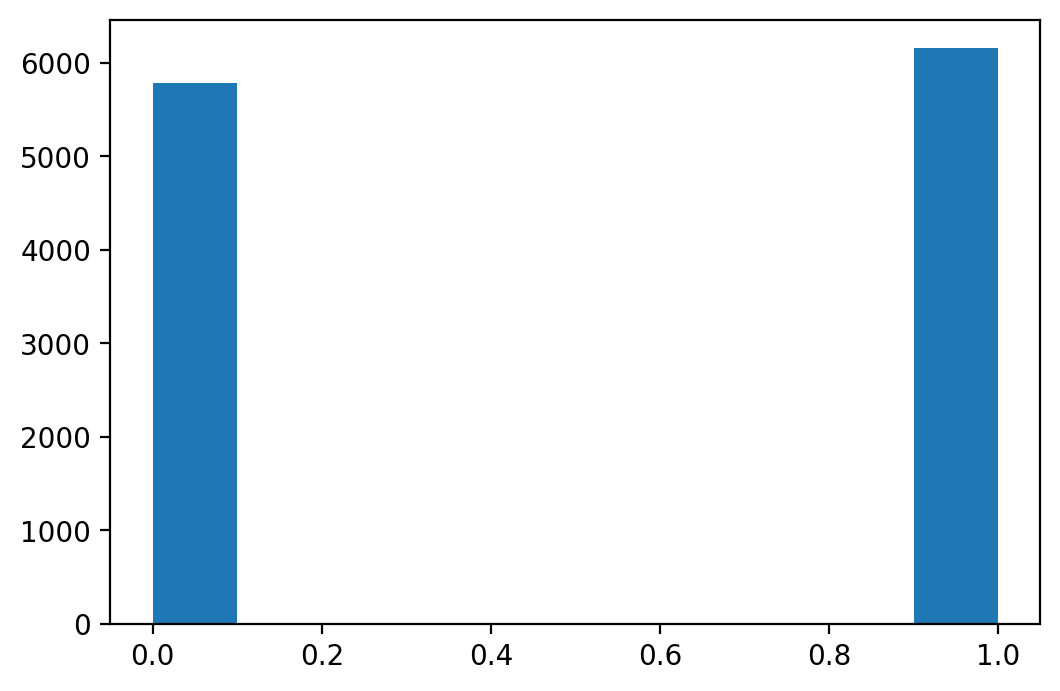

In [20]:
plt.hist(model_lab)

In [21]:
def shuffle_data(labels, image_set_1, image_set_2):

  c = list(zip(labels, image_set_1, image_set_2))
  np.random.shuffle(c)
  labels, image_set_1, image_set_2 = zip(*c)

  return labels, image_set_1, image_set_2

In [22]:
model_lab, model_in_1, model_in_2 = shuffle_data(model_lab, model_in_1, model_in_2)

In [23]:
## I am just checking that everything has the correct shape

print(np.shape(model_in_1))
print(np.shape(model_in_2))
print(np.shape(model_lab))

(11945, 100, 80)
(11945, 100, 80)
(11945,)


In [24]:
model_in_1 = tf.expand_dims(model_in_1, axis = 3)
model_in_2 = tf.expand_dims(model_in_2, axis = 3)

In [25]:
def data (model_input_1, model_input_2, model_labels):


  model_in_1 = np.array(model_input_1)
  model_in_2 = np.array(model_input_2)
  model_lab = np.array(model_labels)

  tr_input_1, te_input_1 = slice_data(model_in_1, 0.8)
  tr_input_2, te_input_2 = slice_data(model_in_2, 0.8)
  tr_labels, te_labels = slice_data(model_lab, 0.8)

  train_input_1, val_input_1 = slice_data(tr_input_1, 0.8)
  train_input_2, val_input_2 = slice_data(tr_input_2, 0.8)
  train_labels, val_labels =slice_data(tr_labels, 0.8)

  train_input_1 = train_input_1.astype('float32') / 255.0
  val_input_1 = val_input_1.astype('float32') / 255.0
  te_input_1 = te_input_1.astype('float32') / 255.0

  train_input_2 = train_input_2.astype('float32') / 255.0
  val_input_2 = val_input_2.astype('float32') / 255.0
  te_input_2 = te_input_2.astype('float32') / 255.0

  tr_labels = train_labels.astype('float32')
  val_labels = val_labels.astype('float32')
  te_labels = te_labels.astype('float32')

  return (train_input_1, te_input_1, val_input_1, train_input_2, te_input_2, val_input_2, tr_labels, val_labels, te_labels)


In [26]:
train_input_1, te_input_1, val_input_1, train_input_2, te_input_2, val_input_2, train_labels, val_labels, te_labels = data(model_in_1, model_in_2, model_lab)

### 1. Develop a machine learning classifier that can successfully identify $\nu_\mu$ charged-current events

This is essentially a binary classification problem. 

Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. Typical binary classification problems include:

Medical testing to determine if a patient has certain disease or not;
Quality control in industry, deciding whether a specification has been met;
In information retrieval, deciding whether a page should be in the result set of a search or not.
Binary classification is dichotomization applied to a practical situation.

Source: https://en.wikipedia.org/wiki/Binary_classification

We are going to label the $\nu_\mu$ charged-current events as 1 and the rest as 0 to be able to easily identify these events. 


## KERAS CONV2D STRUCTURE
tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)


### Filters

The first required Conv2D parameter is the number of filters that the convolutional layer will learn.

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output.


### Kernel_size
The second required parameter you need to provide to the Keras Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.

The kernel_size must be an odd integer as well.

Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7) . It’s rare to see kernel sizes larger than 7×7.

So, when do you use each?

If your input images are greater than 128×128 you may choose to use a kernel size > 3 to help (1) learn larger spatial filters and (2) to help reduce volume size.

### Padding 
The padding parameter to the Keras Conv2D class can take on one of two values: valid or same .

With the valid parameter the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

If you instead want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size, then you would want to supply a value of same for the padding

In [27]:
def create_convolution_layers(input_img):

  model = Conv2D(8, (3, 3), activation = "relu", padding='same', input_shape=input_shape[1:])(input_img)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(16, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)
    
  model = Conv2D(32, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)

    
  return model

I need to carefully check the parameters being used in the cnn. I need to find the perfect balance between overfitting the data and underfitting. 

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7


In [28]:
input_shape = np.shape(model_in_1)
print(input_shape)

(11945, 100, 80, 1)


In [29]:
xy_input = Input(shape= input_shape[1:])
xy_model = create_convolution_layers(xy_input)

yz_input = Input(shape=input_shape[1:])
yz_model = create_convolution_layers(yz_input)

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation = "relu")(dense)
dense = Dropout(0.5)(dense)
dense = Dense(32, activation = "relu")(dense)
dense = Dropout(0.5)(dense)

output = Dense(1, activation ="sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [30]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1,train_input_2],y=train_labels, batch_size=64, epochs=25,validation_data=([val_input_1,val_input_2],val_labels), callbacks =[earlystopping])

Epoch 1/25
120/120 [==============================] - 10s 17ms/step - loss: 0.6901 - accuracy: 0.5259 - val_loss: 0.6395 - val_accuracy: 0.6384
Epoch 2/25
120/120 [==============================] - 2s 13ms/step - loss: 0.6435 - accuracy: 0.6358 - val_loss: 0.6074 - val_accuracy: 0.6525
Epoch 3/25
120/120 [==============================] - 2s 13ms/step - loss: 0.6046 - accuracy: 0.6794 - val_loss: 0.5623 - val_accuracy: 0.7038
Epoch 4/25
120/120 [==============================] - 2s 13ms/step - loss: 0.5712 - accuracy: 0.7105 - val_loss: 0.5373 - val_accuracy: 0.7242
Epoch 5/25
120/120 [==============================] - 2s 13ms/step - loss: 0.5753 - accuracy: 0.7131 - val_loss: 0.5225 - val_accuracy: 0.7347
Epoch 6/25
120/120 [==============================] - 2s 13ms/step - loss: 0.5218 - accuracy: 0.7396 - val_loss: 0.5274 - val_accuracy: 0.7363
Epoch 7/25
120/120 [==============================] - 2s 13ms/step - loss: 0.5301 - accuracy: 0.7443 - val_loss: 0.5228 - val_accuracy: 0.726

In [31]:
test_loss, test_acc = model.evaluate([te_input_1,te_input_2],  te_labels, verbose=2)

75/75 - 0s - loss: 0.4859 - accuracy: 0.7648


Text(0.5, 1.0, 'Accuracy of model')

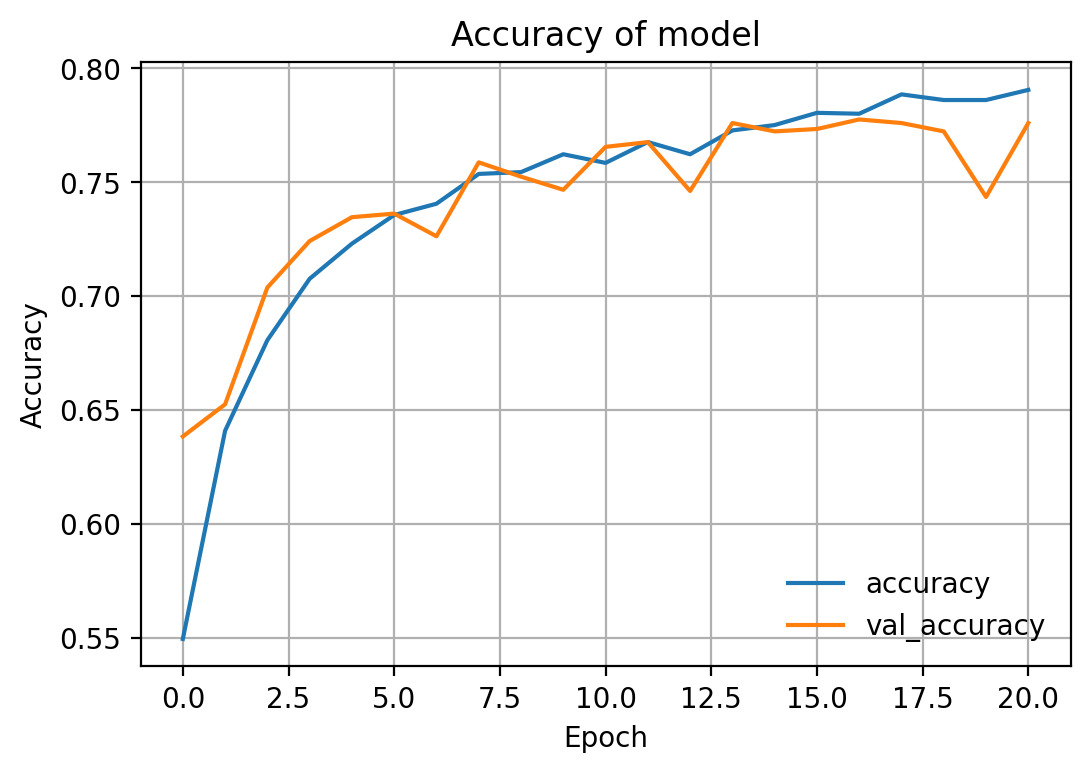

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

### OVERFITTING 

https://datascience.stackexchange.com/questions/19124/how-to-know-the-model-has-started-overfitting

https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d


## TASK 2

In [33]:
files_t2 = data_retriever(70)

In [34]:
numu_counter = 0
nue_counter = 0
nutau_counter = 0
other_counter = 0

for i in tqdm(range(len(files_t2))):
  
  for j in range(len(files_t2[i]['neutrino']['interaction'])):

    if files_t2[i]['neutrino']['interaction'][j] <= 3:

      numu_counter= numu_counter + 1

    elif files_t2[i]['neutrino']['interaction'][j] > 4 and files_t2[i]['neutrino']['interaction'][j] <= 7:

      nue_counter= nue_counter + 1

    elif files_t2[i]['neutrino']['interaction'][j] > 7 and files_t2[i]['neutrino']['interaction'][j] <= 11:

      nutau_counter= nutau_counter + 1

    else:

      other_counter = other_counter + 1

totalevents = numu_counter + nue_counter + nutau_counter + other_counter

In [35]:
## Displaying the number of events and its percentages

display(Math(r'There \; are \; {} \; \nu_\mu \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(numu_counter, round(((numu_counter / totalevents ) * 100),2), len(files_t2))))
display(Math(r'There \; are \; {} \; \nu_\tau \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nutau_counter, round(((nutau_counter / totalevents ) * 100),2), len(files_t2))))
display(Math(r'There \; are \; {} \; \nu_e \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nue_counter, round(((nue_counter / totalevents ) * 100),2), len(files_t2))))
display(Math(r'There \; are \; {} \; other \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(other_counter, round(((other_counter / totalevents ) * 100),2), len(files_t2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
## BINARY CLASSIFICATION TO IDENTIFY ELECTRON NEUTRINO EVENTS 

model_lab_tau_inc=[]
model_in_1_tau_inc = []
model_in_2_tau_inc = []

for i in tqdm(range(0,7)):

    for j in range(len(files_t2[i]['neutrino']['interaction'])):
      model = files_t2[i]['cvnmap'][j].reshape((2,100,80))
      model_in_1_tau_inc.append(model[0])
      model_in_2_tau_inc.append(model[1])

      if files_t2[i]['neutrino']['interaction'][j] > 3 and files_t2[i]['neutrino']['interaction'][j] <= 7:
        model_lab_tau_inc.append(int(1)) # CC electron neutrino events as 1

      else:
        model_lab_tau_inc.append(int(0)) # other events have labels of 0

In [37]:
model_lab_tau = []
model_in_1_tau = []
model_in_2_tau = []

for i in tqdm(range(0,70)):
  data_length = len(files_t2[i]['neutrino']['interaction'])
  for j in range(data_length):  
    if (files_t2[i]['neutrino']['interaction'][j])>=4 and (files_t2[i]['neutrino']['interaction'][j])<=7: 
      m = (files_t2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1_tau.append(m[0])
      model_in_2_tau.append(m[1])
      model_lab_tau.append(int(1)) # 1 is electron neutrino charged-current event
    else:
      pass
    

for z in range(0,1):
  data_length = len(files_t2[i]['neutrino']['interaction'])
  for k in range(data_length):
    if (files_t2[z]['neutrino']['interaction'][k])<=3 or (files_t2[z]['neutrino']['interaction'][k])>=8:
      m = (files_t2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1_tau.append(m[0])
      model_in_2_tau.append(m[1])
      model_lab_tau.append(int(0)) # 0 is not electron neutrino charged-current event
    else:
      pass

(0.0, 2.0)

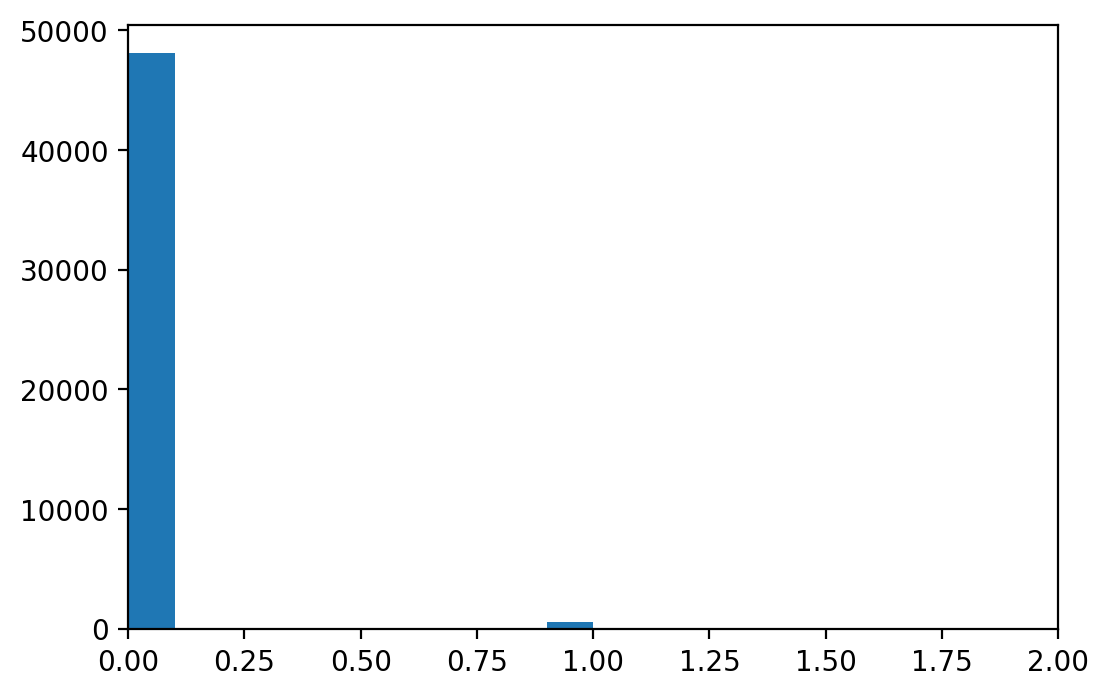

In [38]:
plt.hist(model_lab_tau_inc)
plt.xlim(0,2)

From the histogram above I would expect to have a really low accuracy from the CNN when I try to detect electron neutrinos. 

(array([6799.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

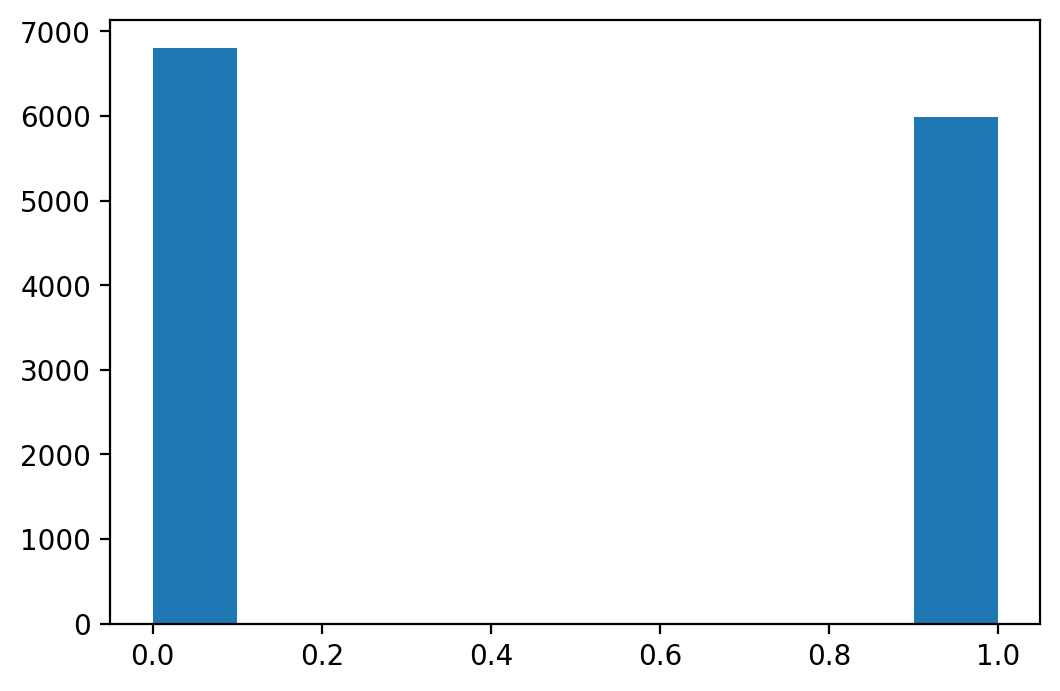

In [39]:
plt.hist(model_lab_tau)

In [40]:
model_in_1_tau = tf.expand_dims(model_in_1_tau, axis = 3)
model_in_2_tau = tf.expand_dims(model_in_2_tau, axis = 3)

In [41]:
train_input_1_tau, te_input_1_tau, val_input_1_tau, train_input_2_tau, te_input_2_tau, val_input_2_tau, train_labels_tau, val_labels_tau, te_labels_tau = data(model_in_1_tau, model_in_2_tau, model_lab_tau)

In [42]:
input_shape = np.shape(model_in_1_tau)
print(input_shape)

(12789, 100, 80, 1)


In [43]:
xy_input = Input(shape= input_shape[1:])
xy_model = create_convolution_layers(xy_input)

yz_input = Input(shape=input_shape[1:])
yz_model = create_convolution_layers(yz_input)

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
#dense = Dense(32, activation = "relu")(dense)
#dense = Dropout(0.5)(dense)
#dense = Dense(32, activation = "relu")(dense)
#dense = Dropout(0.5)(dense)

output = Dense(1, activation = "sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 100, 80, 8)   80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 100, 80, 8)   80          input_4[0][0]                    
____________________________________________________________________________________________

In [44]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1_tau,train_input_2_tau],y=train_labels_tau, batch_size=300, epochs=20,validation_data=([val_input_1_tau,val_input_2_tau],val_labels_tau), callbacks =[earlystopping])

Epoch 1/20
28/28 [==============================] - 3s 64ms/step - loss: 0.5110 - accuracy: 0.8036 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 1s 50ms/step - loss: 0.0359 - accuracy: 0.9952 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 1s 50ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 1s 51ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 1.6536e-04 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 1s 50ms/step - loss: 0.0031 - accuracy: 0.9985 - val_loss: 6.9115e-05 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 1s 50ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 4.2668e-05 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 1s 50ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 3.8881e-05 - val_accuracy: 1.00

In [45]:
test_loss, test_acc = model.evaluate([te_input_1_tau,te_input_2_tau],  te_labels_tau, verbose=2)

80/80 - 0s - loss: 1.1415e-08 - accuracy: 1.0000


Text(0.5, 1.0, 'Accuracy of model')

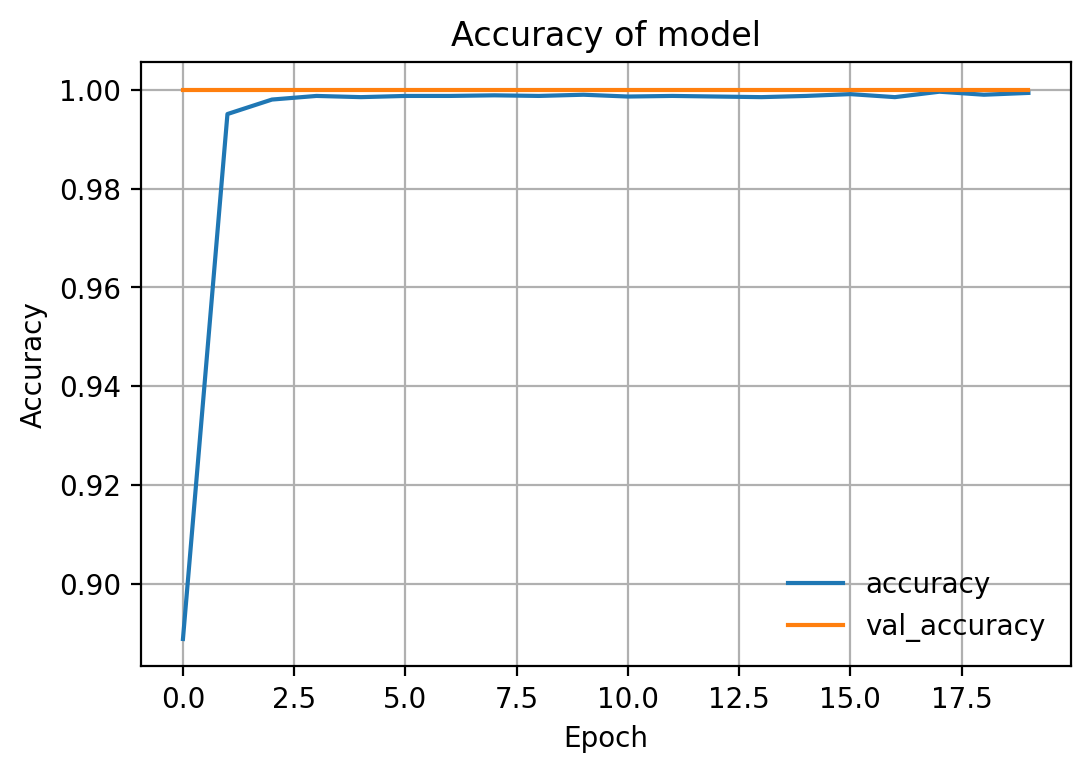

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

I expected to see a lower accuracy for electron neutrinos as there is a lower percentage of these events in the data and I thought the network wouldn't have been able to learn that much to identify these events. 

Investigating this issue I came across the data imbalance paradox and realised I need to fix my data in order to get better results. 

I revisit task 1 and task 2 to fix the data imbalance and see how the accuracy of the network improves. 

(I should plots histograms here to show how I balance out the 0s and 1s)

# EXTENSIONS

### TASK 2: Write a machine learning algorithm to determine the flavour of the neutrino

In [47]:
files_e2 = data_retriever(200)

In [ ]:
numu_counter = 0
nue_counter = 0
nutau_counter = 0
other_counter = 0

for i in tqdm(range(len(files_e2))):
  
  for j in range(len(files_e2[i]['neutrino']['interaction'])):

    if files_e2[i]['neutrino']['interaction'][j] <= 3:

      numu_counter= numu_counter + 1

    elif files_e2[i]['neutrino']['interaction'][j] > 4 and files_e2[i]['neutrino']['interaction'][j] <= 7:

      nue_counter= nue_counter + 1

    elif files_e2[i]['neutrino']['interaction'][j] > 7 and files_e2[i]['neutrino']['interaction'][j] <= 11:

      nutau_counter= nutau_counter + 1

    else:

      other_counter = other_counter + 1

totalevents = numu_counter + nue_counter + nutau_counter + other_counter

In [ ]:
## Displaying the number of events and its percentages

display(Math(r'There \; are \; {} \; \nu_\mu \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(numu_counter, round(((numu_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_\tau \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nutau_counter, round(((nutau_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_e \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nue_counter, round(((nue_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; other \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(other_counter, round(((other_counter / totalevents ) * 100),2), len(files_e2))))

In [ ]:
## LABELLING MU AS 1, ELECTRON AS 2 AND TAU AS 3

model_lab = []
model_in_1 = []
model_in_2 = []

for i in tqdm(range(0,7)):
  data_length = len(files_e2[i]['neutrino']['interaction'])

  for j in range(data_length): 

    if (files_e2[i]['neutrino']['interaction'][j]) < 3: 

      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(1)) # 1 is for mu neutrinos 
    
    elif (files_e2[i]['neutrino']['interaction'][j]) > 3 and (files_e2[i]['neutrino']['interaction'][j]) <= 7:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(2)) # 2 is for electron neutrinos 
    
    elif (files_e2[i]['neutrino']['interaction'][j]) > 7 and (files_e2[i]['neutrino']['interaction'][j]) <= 11:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(3)) # 0 is Not muon charged-current event

    else:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(0)) # 0 is Not muon charged-current event


There are no tau flavoured neutrinos in the 200 files, therefore there is no data for this flavour to feed into the network. The network will only be able to distinguish between electron and mu neutrinos. 

I am only going to train my network for these two 

In [ ]:
plt.hist(model_lab)